In [19]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def loadData(fileName):
    X = pd.read_csv(fileName, sep=',', parse_dates=[], infer_datetime_format=True, index_col=['APN'], quotechar='"')
    X = X[X['BESTSTAT'] == 'CONSTRUCTION']
    return X

data = []

data.append(loadData('data/SF_Development_Pipeline_2016_Q1.csv'))
data.append(loadData('data/SF_Development_Pipeline_2016_Q2.csv'))
data.append(loadData('data/SF_Development_Pipeline_2016_Q3.csv'))
data.append(loadData('data/SF_Development_Pipeline_2016_Q4.csv'))
data.append(loadData('data/SF_Development_Pipeline_2017_Q1.csv'))

# filtered = data[3][~data[3].index.isin(data[4].index)]
# data[2].loc['APN 3783001']
# print(len(data[3]))
# print(len(filtered))
# filtered#.loc['APN 3783001']
#print(data[2][0])

In [143]:
preprocessed = []
for i in range(len(data)):
    X = data[i]
    X = X[X['UNITS'] > 0]
    X = X[X['NET_UNITS'] > 0]
    # X = X[X['NET_UNITS'] > X['UNITS']]
    preprocessed.append(X)
    
completed = []
for i in range(len(preprocessed)-1):
    completed.append(preprocessed[i][~preprocessed[i].index.isin(preprocessed[i+1].index)])
buildings = list(map(lambda x: len(x), completed))
units = list(map(lambda x: x['NET_UNITS'].values.sum(), completed))
units2 = list(map(lambda x: x['UNITS'].values.sum(), completed))
print(buildings)
print(units)
print(units2)

[26, 33, 43, 50]
[616, 864, 1239, 977]
[688, 884, 1273, 1154]


In [136]:
completed[0]

,PROJECT_TYPE,NAMEADDR,Alias,BESTDATE,BESTSTAT,Entitlement,PLN_CASENO,PLN_DESC,BP_APPLNO,BP_DESC,...,CONTACTPH,NEIGHBORHOOD,PLAN_AREA,PLAN_DISTRICT,SUPE_DISTRICT,HEIGHT_DISTRICT,ZONING,ZONING_DISTRICT,PLANNER,LOCATION
APN,,,,,,,,,,,,,,,,,,,,,
APN 3833002,Resident,1006 / 1050 16TH ST & 1380 07TH ST,POTRERO1010,03/30/2016,CONSTRUCTION,-1,2003.0527,The proposed project involves the construction...,2.011121e+11,ERECT 6 STORY 393 UNITS RESIDENTIAL & COMMERCI...,...,NaN,South of Market,Showplace Square/Potrero Hill (EN),South of Market,SUPERVISORIAL DISTRICT 10,68-X,UMU,URBAN MIXED USE,KDURANDE,"(37.7666898720, -122.397182)"
APN 3702054,Resident,1155 MARKET ST,NaN,02/23/2016,CONSTRUCTION,-1,NaN,NaN,2.015070e+11,"CHANGE OF USE. T-I INCLUDES NEW PARTITIONS, LI...",...,NaN,South of Market,Downtown,Downtown,SUPERVISORIAL DISTRICT 6,120-X,C-3-G,DOWNTOWN- GENERAL,NaN,"(37.7792227726, -122.413409)"
APN 5938049,Resident,1315 SILLIMAN ST,NaN,03/11/2016,CONSTRUCTION,-1,NaN,NaN,2.015042e+11,UNIT LEGALIZATION PER ORDINANCE 43-14 (EXISTIN...,...,NaN,Excelsior,NaN,South Central,SUPERVISORIAL DISTRICT 9,40-X,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",NaN,"(37.7276210028, -122.418165)"
APN 5319028,Resident,1987 OAKDALE AV,NaN,03/23/2016,CONSTRUCTION,-1,NaN,NaN,2.015051e+11,ADD 202 SQ FT HORIZONTAL EXTENSION TO REAR OF ...,...,NaN,Bayview,Bayview Hunters Point,South Bayshore,SUPERVISORIAL DISTRICT 10,40-X,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",NaN,"(37.7384878582, -122.397734)"
APN 2821010,Resident,83 PANORAMA DR,NaN,03/17/2015,CONSTRUCTION,-1,NaN,NaN,2.007111e+11,ERECT A NEW 2 STORY SINGLE FAMILY DWELLING.,...,NaN,Twin Peaks,NaN,Inner Sunset,SUPERVISORIAL DISTRICT 7,40-X,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",NaN,"(37.7468757324, -122.450958)"
APN 0570011,Resident,1650 BROADWAY *,NaN,03/21/2016,CONSTRUCTION,-1,2008.0862,NaN,2.012031e+11,"ERECT 7 STORIES, 2 BASEMENTS 34 DWELLING UNITS...",...,NaN,Pacific Heights,NaN,Marina,SUPERVISORIAL DISTRICT 2,80-A,RM-3,"RESIDENTIAL- MIXED, MEDIUM DENSITY",GCABRERO,"(37.7959125169, -122.424471)"
APN 2040001,Resident,1701 09TH AV,NaN,01/08/2013,CONSTRUCTION,-1,2009.0129,"Demo existing commercial building, subdivide l...",2.009041e+11,Multiple Permits,...,NaN,Inner Sunset,NaN,Inner Sunset,SUPERVISORIAL DISTRICT 7,40-X,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",NaN,"(37.7563826347, -122.466062)"
APN 2038A019,Resident,1758 12TH AV,NaN,12/08/2015,CONSTRUCTION,-1,NaN,NaN,2.013053e+11,ERECT 3-STORY TYPE V SINGLE FAMILY RESIDENCE.,...,NaN,Inner Sunset,NaN,Inner Sunset,SUPERVISORIAL DISTRICT 7,40-X,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",NaN,"(37.7553555415, -122.468599)"
APN 5859040,Resident,230 SWEENY ST,NaN,12/22/2014,CONSTRUCTION,-1,2010.0249,NaN,2.009033e+11,"BLDG.#2: ERECT A 3 STORIES, SINGLE FAMILY DWEL...",...,NaN,Excelsior,NaN,South Central,SUPERVISORIAL DISTRICT 9,40-X,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",NaN,"(37.7324923506, -122.410121)"


In [137]:
completed[1]

,Entitlement,BESTSTAT,BESTDATE,NAMEADDR,Alias,PLN_CASENO,BP_APPLNO,UNITS,NET_UNITS,AFF_UNITS,...,SP_CONTACT,SP_CONTACTPH,NEIGHBORHOOD,PLAN_AREA,PLAN_DISTRICT,HEIGHT_DISTRICT,ZONING_SIM,ZONING_DISTRICT,SUPE_DISTRICT,Location
APN,,,,,,,,,,,,,,,,,,,,,
APN 0837003,1,CONSTRUCTION,06/16/2016,1 FRANKLIN ST,NaN,2010,2.009120e+11,35,35,5,...,Closed,Closed,Downtown/Civic Center,Market and Octavia,Buena Vista,85-X,NCT-3,MODERATE SCALE NEIGHBORHOOD COMMERCIAL TRANSIT...,SUPERVISORIAL DISTRICT 5,"(37.77442891680, -122.42111019300)"
APN 0757025,1,CONSTRUCTION,07/01/2016,1100 GOLDEN GATE AV,1239 TURK ST,2008,2.012071e+11,98,98,98,...,Closed,Closed,Western Addition,NaN,Western Addition,50-X,RM-3,"RESIDENTIAL- MIXED, MEDIUM DENSITY",SUPERVISORIAL DISTRICT 5,"(37.78035348790, -122.42950939400)"
APN 6942054,1,CONSTRUCTION,03/15/2016,1325 OCEAN AV,NaN,NaN,2.013011e+11,2,1,0,...,NaN,NaN,Ocean View,Balboa Park,Ingleside,45-X,NCT,OCEAN AVENUE NEIGHBORHOOD COMMERCIAL TRANSIT,SUPERVISORIAL DISTRICT 7,"(37.72369602620, -122.45665818200)"
APN 1827013A,1,CONSTRUCTION,06/17/2016,1477 26TH AV,NaN,NaN,2.014112e+11,2,1,0,...,NaN,NaN,Outer Sunset,NaN,Outer Sunset,40-X,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",SUPERVISORIAL DISTRICT 4,"(37.75991021760, -122.48472371600)"
APN 1223003,1,CONSTRUCTION,08/26/2015,1625 OAK ST,NaN,NaN,2.015022e+11,1,1,0,...,NaN,NaN,Haight Ashbury,NaN,Buena Vista,40-X,RM-1,"RESIDENTIAL- MIXED, LOW DENSITY",SUPERVISORIAL DISTRICT 5,"(37.77144572890, -122.44592669000)"
APN 1179024A,1,CONSTRUCTION,12/24/2015,1631 MCALLISTER ST,NaN,2014,2.013110e+11,4,4,0,...,Closed,Closed,Western Addition,NaN,Western Addition,40-X,RM-1,"RESIDENTIAL- MIXED, LOW DENSITY",SUPERVISORIAL DISTRICT 5,"(37.77741685330, -122.43907871800)"
APN 0647007,1,CONSTRUCTION,07/01/2016,1634 - 1690 PINE ST,ROCKWELL,2011,2.013122e+11,260,260,31,...,Closed,Closed,Western Addition,Van Ness Corridor,Western Addition,130-E,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",SUPERVISORIAL DISTRICT 2,"(37.78959297440, -122.42295081000)"
APN 0686040,1,CONSTRUCTION,06/06/2016,1656 POST ST,NaN,NaN,2.014092e+11,4,4,0,...,NaN,NaN,Western Addition,Japantown,Western Addition,50-X,NCD,JAPANTOWN NEIGHBORHOOD COMMERCIAL DISTRICT,SUPERVISORIAL DISTRICT 5,"(37.78590403240, -122.42908004700)"
APN 5617014,1,CONSTRUCTION,09/23/2015,166 WINFIELD ST,NaN,2012,2.011101e+11,2,1,0,...,Closed,Closed,Bernal Heights,NaN,Bernal Heights,40-X,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",SUPERVISORIAL DISTRICT 9,"(37.74260692400, -122.41873098200)"


In [138]:
completed[2]

,PROJECT_TYPE,NAMEADDR,Alias,BESTSTAT,BESTDATE,Entitlement,PLN_CASENO,PLN_DESC,PROPUSE,BP_APPLNO,...,PLANNER,PLAN_AREA,PLN_DISTRICT,SUPE_DISTRICT,ZONING_SIM,ZONING_DISTRICT,ZONING_GEN,NEIGHBORHOOD,HEIGHT_DISTRICT,Location
APN,,,,,,,,,,,,,,,,,,,,,
APN 1736061,Resident,1221 14TH AV,NaN,CONSTRUCTION,06/14/2016,1,NaN,NaN,APARTMENTS,2.015051e+11,...,NKWIATKO,NaN,Inner Sunset,SUPERVISORIAL DISTRICT 5,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,Inner Sunset,40-X,"(37.76523580510, -122.47210972000)"
APN 5403035,Resident,2082 BANCROFT AV,NaN,CONSTRUCTION,11/05/2015,1,NaN,NaN,2 FAMILY DWELLING,2.015062e+11,...,MPUTRA,Bayview Hunters Point,South Bayshore,SUPERVISORIAL DISTRICT 10,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",Residential,Bayview,40-X,"(37.73090814350, -122.40162625600)"
APN 2700012,Resident,4546 19TH ST,NaN,CONSTRUCTION,03/25/2016,1,2012,Remodel with horizontal and vertical additions...,2 FAMILY DWELLING,2.012063e+11,...,MSMITH,NaN,Central,SUPERVISORIAL DISTRICT 8,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,Castro/Upper Market,40-X,"(37.75922793240, -122.44005455400)"
APN 6553024,Resident,1267 NOE ST,NaN,CONSTRUCTION,04/21/2016,1,NaN,NaN,2 FAMILY DWELLING,2.014083e+11,...,TKENNEDY,NaN,Central,SUPERVISORIAL DISTRICT 8,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",Residential,Noe Valley,40-X,"(37.74873708750, -122.43132742700)"
APN 1797006,Resident,1333 42ND AV,NaN,CONSTRUCTION,09/14/2016,1,NaN,NaN,APARTMENTS,2.015051e+11,...,NKWIATKO,NaN,Outer Sunset,SUPERVISORIAL DISTRICT 4,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,Outer Sunset,40-X,"(37.76177165450, -122.50205153200)"
APN 1805006,Resident,1433 48TH AV,NaN,CONSTRUCTION,09/16/2016,1,NaN,NaN,2 FAMILY DWELLING,2.013092e+11,...,JLOOK,Western Shoreline,Outer Sunset,SUPERVISORIAL DISTRICT 4,RM-1,"RESIDENTIAL- MIXED, LOW DENSITY",Residential,Outer Sunset,40-X,"(37.75965832780, -122.50834941800)"
APN 0776035,Resident,1470 MCALLISTER ST,NaN,CONSTRUCTION,06/15/2016,1,NaN,NaN,APARTMENTS,2.013022e+11,...,GCABRERO,NaN,Western Addition,SUPERVISORIAL DISTRICT 5,RM-1,"RESIDENTIAL- MIXED, LOW DENSITY",Residential,Western Addition,40-X,"(37.77827589130, -122.43639816800)"
APN 0753010,Resident,1594 GOLDEN GATE AV,NaN,CONSTRUCTION,04/08/2016,1,2014,BP #201502249184 - Legalizing conversion of a ...,APARTMENTS,2.015022e+11,...,LAJELLO,NaN,Western Addition,SUPERVISORIAL DISTRICT 5,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",Residential,Western Addition,40-X,"(37.77921261200, -122.43676834300)"
APN 5577011,Resident,191 BREWSTER ST,NaN,CONSTRUCTION,06/24/2016,1,2009,"New 2,811 sqft single-family residence on vaca...",1 FAMILY DWELLING,2.006093e+11,...,CTEAGUE,NaN,Bernal Heights,SUPERVISORIAL DISTRICT 9,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",Residential,Bernal Heights,40-X,"(37.74360757820, -122.40717515500)"


In [139]:
completed[3]

,BESTSTAT,BESTDATE,NAMEADDR,Alias,UNITS,NET_UNITS,AFF_UNITS,NET_AFF_UNITS,SECTION415,TENURE_TYPE,...,STATUS,PLAN_DISTRICT,SUPE_DISTRICT,ZONING_SIM,ZONING_DISTRICT,ZONING_GEN,ZONING,HEIGHT_DISTRICT,NEIGHBORHOOD,Location
APN,,,,,,,,,,,,,,,,,,,,,
APN 4210013,CONSTRUCTION,07/03/2013,1196 HAMPSHIRE ST,NaN,2,1,0,0,NaN,NaN,...,Adopted,Mission,SUPERVISORIAL DISTRICT 9,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,RH-2,40-X,Mission,"Y\n(37.75329796030, -122.40760652600)"
APN 0516028A,CONSTRUCTION,01/29/2013,136 PIXLEY ST,NaN,4,4,0,0,NaN,NaN,...,NaN,Marina,SUPERVISORIAL DISTRICT 2,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",Residential,RH-3,40-X,Marina,"(37.79882591870, -122.43480319800)"
APN 1890005,CONSTRUCTION,12/02/2016,1531 44TH AV,NaN,2,1,0,0,NaN,NaN,...,NaN,Outer Sunset,SUPERVISORIAL DISTRICT 4,RH-1,"RESIDENTIAL- HOUSE, ONE FAMILY",Residential,RH-1,40-X,Outer Sunset,"(37.75801002230, -122.50393807500)"
APN 1729012,CONSTRUCTION,02/17/2016,1259 21ST AV,NaN,2,1,0,0,NaN,NaN,...,NaN,Outer Sunset,SUPERVISORIAL DISTRICT 4,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,RH-2,40-X,Outer Sunset,"(37.76421703600, -122.47964798600)"
APN 0671006,CONSTRUCTION,12/30/2016,1450 FRANKLIN ST,NaN,69,69,9,9,On-site BMR Project,NaN,...,NaN,Western Addition,SUPERVISORIAL DISTRICT 2,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",Mixed Use,NC-3,130-E,Western Addition,"(37.78805629210, -122.42325307500)"
APN 0482030,CONSTRUCTION,07/13/2016,1555 FRANCISCO ST,NaN,3,1,0,0,NaN,NaN,...,NaN,Marina,SUPERVISORIAL DISTRICT 2,RH-3,"RESIDENTIAL- HOUSE, THREE FAMILY",Residential,RH-3,40-X,Marina,"(37.80220398800, -122.43059802700)"
APN 2861011,CONSTRUCTION,01/23/2014,160 SAN MARCOS AV,NaN,1,1,0,0,NaN,NaN,...,NaN,Inner Sunset,SUPERVISORIAL DISTRICT 7,RH-1(D),"RESIDENTIAL- HOUSE, ONE FAMILY- DETACHED",Residential,RH-1(D),40-X,West of Twin Peaks,"(37.74709320810, -122.46511538900)"
APN 0620006,CONSTRUCTION,09/20/2016,1601 LARKIN ST,NaN,27,27,0,0,Fee Payment,NaN,...,NaN,Northeast,SUPERVISORIAL DISTRICT 3,RM-3,"RESIDENTIAL- MIXED, MEDIUM DENSITY",Residential,RM-3,65-A,Nob Hill,"(37.79277873080, -122.41976349200)"
APN 5338018,CONSTRUCTION,06/01/2015,1756 REVERE AV,NaN,2,1,0,0,NaN,NaN,...,NaN,South Bayshore,SUPERVISORIAL DISTRICT 10,RH-2,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,RH-2,40-X,Bayview,"(37.73343934720, -122.39275331800)"


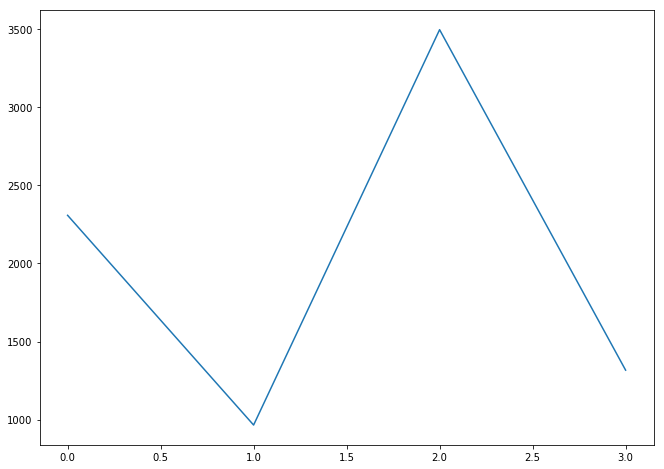

In [133]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(range(len(data)-1), units, label=1)

In [89]:
preprocessed[2]

,PROJECT_TYPE,NAMEADDR,Alias,BESTSTAT,BESTDATE,Entitlement,PLN_CASENO,PLN_DESC,PROPUSE,BP_APPLNO,...,PLANNER,PLAN_AREA,PLN_DISTRICT,SUPE_DISTRICT,ZONING_SIM,ZONING_DISTRICT,ZONING_GEN,NEIGHBORHOOD,HEIGHT_DISTRICT,Location
APN,,,,,,,,,,,,,,,,,,,,,
APN 3783001,Mixres,801 BRANNAN ST,NaN,CONSTRUCTION,09/29/2016,1,2012,Demolish an existing building (Concourse Exhib...,APARTMENTS,2.013090e+11,...,JKUGLER,Showplace Square/Potrero Hill (EN),South of Market,SUPERVISORIAL DISTRICT 6,UMU,URBAN MIXED USE,Mixed Use,South of Market,68-X,"(37.77182385700, -122.40388263400)"
